In [16]:
!python3 --version

Python 3.8.11


In [2]:
import pandas

from utils import calculate_percent_replicating_Target, calculate_percent_matching_Target, plot_simple_comparison, plot_two_comparisons

In [3]:
variable = 'Treatment timepoint'

plate_df = pandas.DataFrame()

experiment_dict = {
    'A549':{
        'Compounds':{
            24:['BR00116991','BR00116992','BR00116993','BR00116994'],
            48:['BR00117015','BR00117016','BR00117017','BR00117019']},
        'ORF':{
            48:['BR00117020','BR00117021'],
            96:['BR00118050','BR00117006']},
        'CRISPR':{
            96:['BR00118041','BR00118042','BR00118043','BR00118044'],
            144:['BR00117000','BR00117003','BR00117004','BR00117005']}
            },
    'U2OS':{
        'Compounds':{
            24:['BR00116995','BR00117024','BR00117025','BR00117026'],
            48:['BR00117010','BR00117011','BR00117012','BR00117013']},
        'ORF':{
            48:['BR00117022','BR00117023'],
            96:['BR00118039','BR00118040']},
        'CRISPR':{
            96:['BR00118045','BR00118046','BR00118047','BR00118048'],
            144:['BR00116996','BR00116997','BR00116998','BR00116999' ]}
            }
    }

for eachline in list(experiment_dict.keys()):
    for eachmodality in list(experiment_dict[eachline].keys()):
        for eachtimepoint in list(experiment_dict[eachline][eachmodality].keys()):
            for eachsphere in [None,'batch','plate']:
                plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachline][eachmodality][eachtimepoint], 
                variable : eachtimepoint, 'Cell Type' : eachline, 'Percent Replicating' : calculate_percent_replicating_Target(
                    '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',experiment_dict[eachline][eachmodality][eachtimepoint],
                    sphere=eachsphere),'Modality':eachmodality, 'sphere':str(eachsphere)}, ignore_index=True)

/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/usr/local/lib/python3.8/site-packages/seaborn/c

Saved to ../figures/Treatment timepoint-Cell Type.png


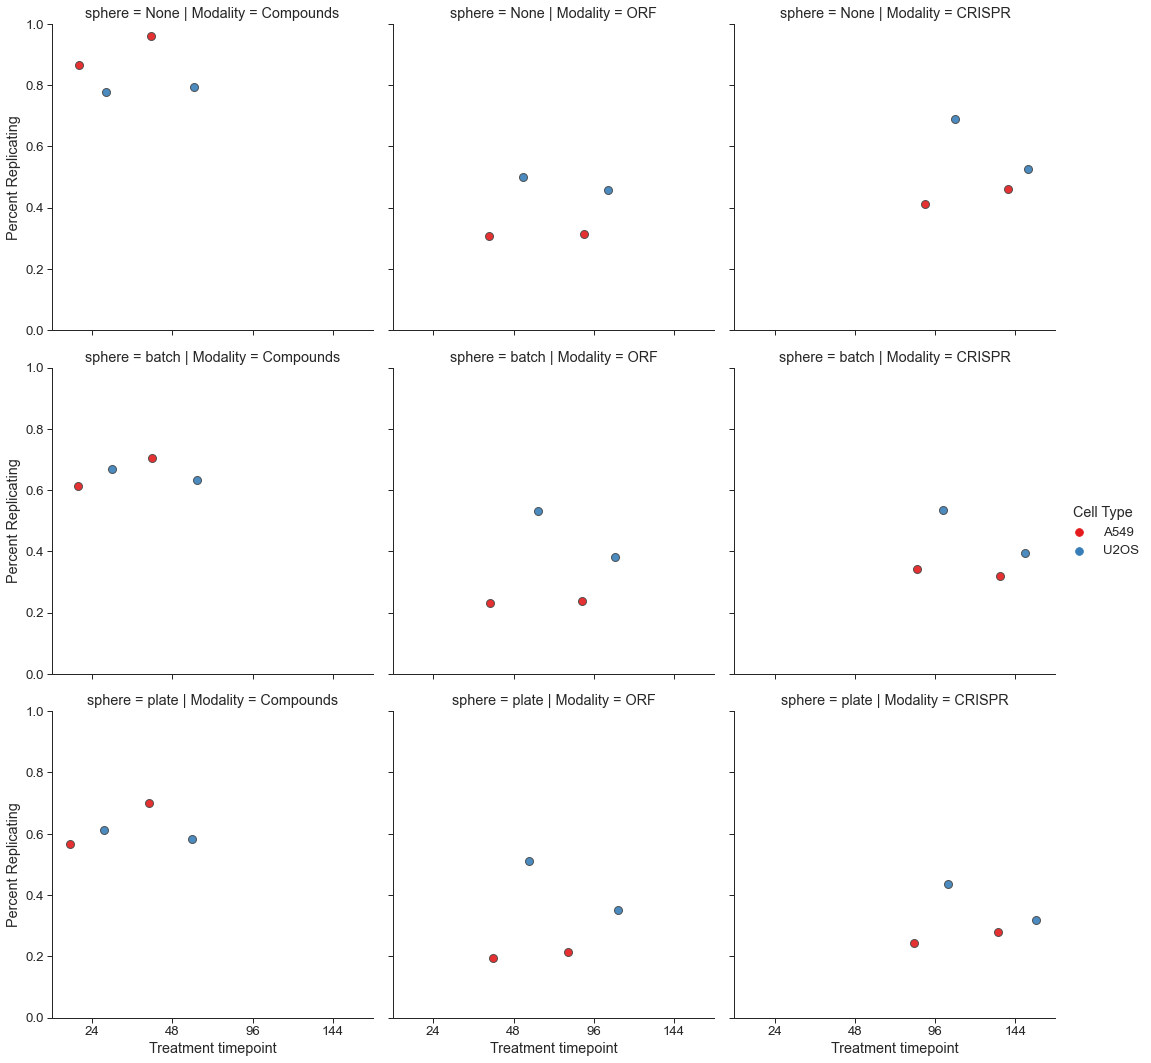

In [4]:
#You may find that running this a couple of times is needed to find a version where the jitter is about right
plot_simple_comparison(df=plate_df,x=variable,hue='Cell Type',col = 'Modality',row='sphere')

In [21]:
variable = 'Treatment timepoint'

plate_match_df = pandas.DataFrame()

comparison_list = []

for eachline in list(experiment_dict.keys()):
    for eachmodality1 in list(experiment_dict[eachline].keys()):
        for eachmodality2 in list(experiment_dict[eachline].keys()):
            for eachtimepoint1 in list(experiment_dict[eachline][eachmodality1].keys()):
                for eachtimepoint2 in list(experiment_dict[eachline][eachmodality2].keys()):
                    string1 = f"{eachline}-{eachmodality1}-{eachtimepoint1}"
                    string2 = f"{eachline}-{eachmodality2}-{eachtimepoint2}"
                    if string1 != string2:
                        if f"{string1}-{string2}" not in comparison_list:
                            if f"{string2}-{string1}" not in comparison_list:
                                comparison_list.append(f"{string1}-{string2}")
                                for eachsphere in [None,'batch','plate']:
                                    plate_match_df = plate_match_df.append({'Percent Matching' : calculate_percent_matching_Target(
                                        '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',
                                        experiment_dict[eachline][eachmodality1][eachtimepoint1],eachmodality1, 
                                        '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',
                                        experiment_dict[eachline][eachmodality2][eachtimepoint2],eachmodality2,sphere=eachsphere),
                                        'Modality 1':eachmodality1,'Modality 2':eachmodality2, 'Modality Match':f'{eachmodality1}-{eachmodality2}',
                                        variable:f'{eachtimepoint1}-{eachtimepoint2}','Cell Type':eachline,'sphere':str(eachsphere)}, ignore_index=True)


Saved to TreatmentTimepoint-PercentMatch-JustShowMatching.png


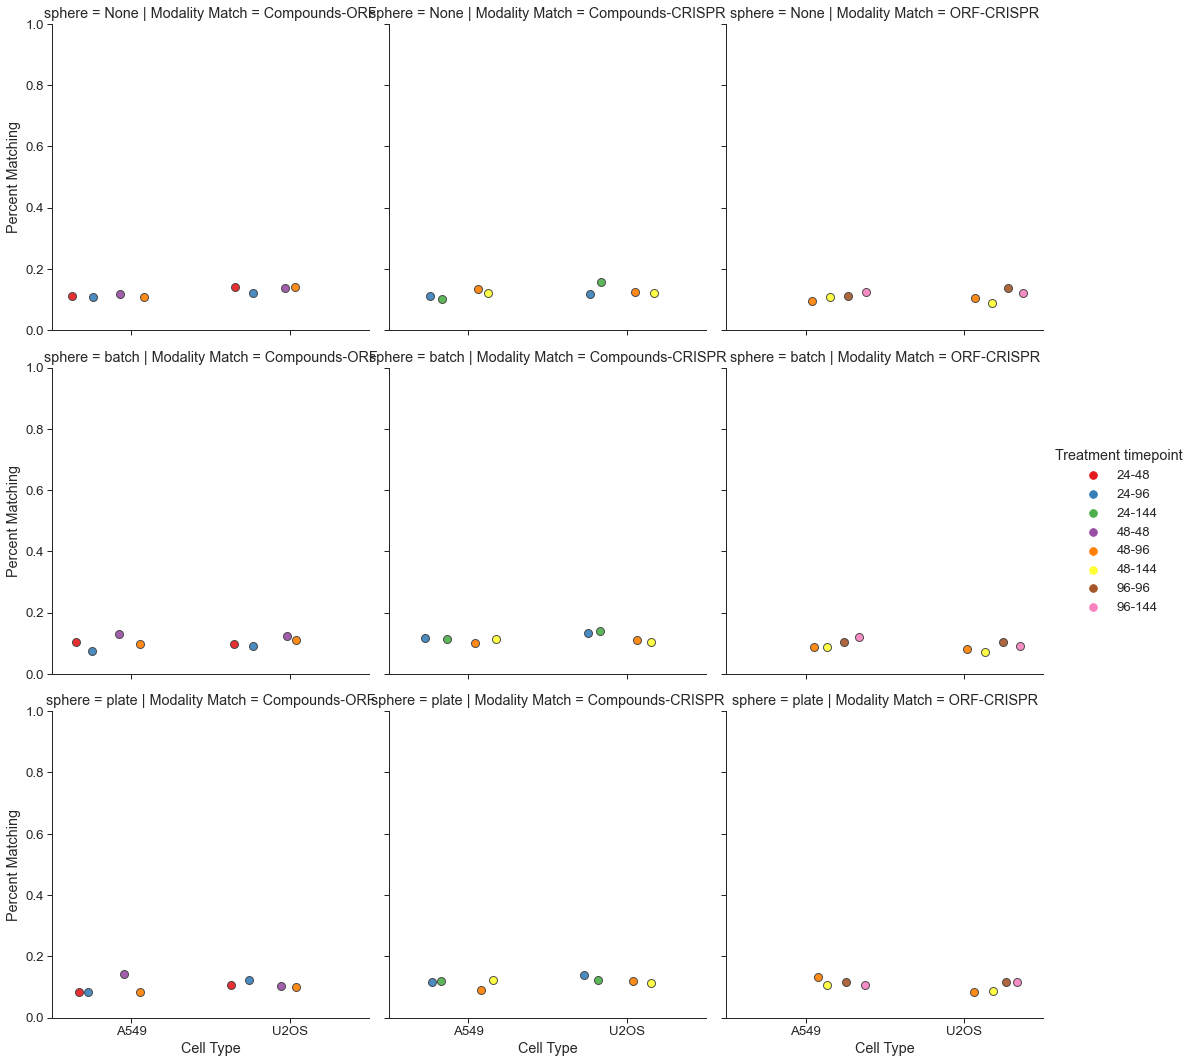

In [24]:
hue_order_list=['24-48','24-96','24-144','48-48','48-96','48-144','96-96','96-144']
plot_simple_comparison(plate_match_df,x='Cell Type',
y='Percent Matching',hue=variable,hue_order=hue_order_list,
col = 'Modality Match',col_order=['Compounds-ORF','Compounds-CRISPR','ORF-CRISPR'],
row='sphere',plotname = 'TreatmentTimepoint-PercentMatch-JustShowMatching.png')

In [ ]:
hue_order_list=['24-48','24-96','24-144','48-48','48-96','48-144','96-96','96-144']
unsphered = plate_match_df.query('sphere == "None"')
plot_simple_comparison(df=unsphered,x='Cell Type',y='Percent Matching',hue=variable,hue_order=hue_order_list,col = 'Modality 1',row='Modality 2',
plotname = 'TreatmentTimepoint-PercentMatch-unsphered.png')

In [ ]:
batchsphered = plate_match_df.query('sphere == "batch"')
plot_simple_comparison(df=batchsphered,x='Cell Type',y='Percent Matching',hue=variable,hue_order=hue_order_list,col = 'Modality 1',row='Modality 2',
plotname = 'TreatmentTimepoint-PercentMatch-batchsphered.png')

In [ ]:
platesphered = plate_match_df.query('sphere == "plate"')
plot_simple_comparison(df=platesphered,x='Cell Type',y='Percent Matching',hue=variable,hue_order=hue_order_list,col = 'Modality 1',row='Modality 2',
plotname = 'TreatmentTimepoint-PercentMatch-platesphered.png')